# Advertising sales project

IMPORTING NEEDED LYBRARIES

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# CHECKING THE DATA ROWS AND COLUMNS

In [29]:
df=pd.read_csv("Adsales.csv")

In [30]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [31]:
df.head

<bound method NDFrame.head of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [32]:
df.tail

<bound method NDFrame.tail of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [33]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [34]:
df.shape

(200, 5)

In [35]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# DATASET DESCRIPTION

Data consisting different advertising details like TV,radio,newspaper and its influence in target,, 
by analysing the datas it is sure that the unmamed :0 column contains no data (unwanted ordinal data column)..
any way the dataset consisting 200 rows and 5 columns.
    

by the analysis here manually dropping the unwanted column 'Unnamed: 0'

In [36]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [37]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


checking null variable

In [38]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

there is no null variable presence in our dataset

<AxesSubplot:>

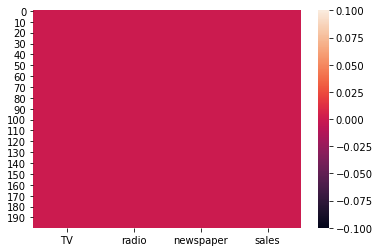

In [39]:
sns.heatmap(df.isnull())

from the map it is clear that tere is no null variable in the dataset

# EDA

# ANALYSING-TARGET

Sales is our target,, here we analysing it

In [40]:
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

from analysing unique values it is clear that our target contains contineous dataset and we have to use
regression algoritms. 

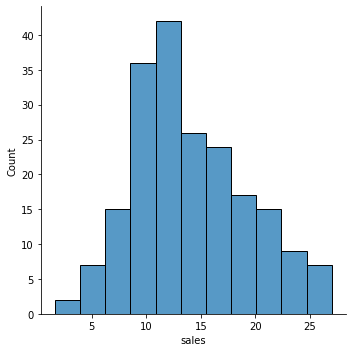

In [41]:
sns.displot(df['sales'])

distribution plot of our target variable is showing,,it is distributed normally

# ANALYSING FEATURE VARIABLES

<AxesSubplot:xlabel='TV', ylabel='Density'>

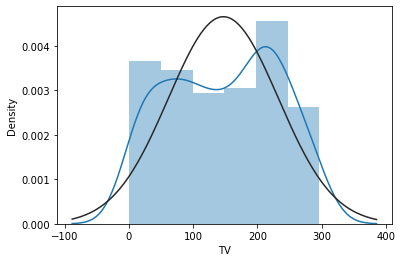

In [42]:
sns.distplot(df['TV'],fit=norm)

COLUMN 'TV'HAVE NOT A NORMAL DISTRIBUTION OF DATA.A SLIGHT POSITIVE SKEWNESS IS THERE

<AxesSubplot:xlabel='radio', ylabel='Density'>

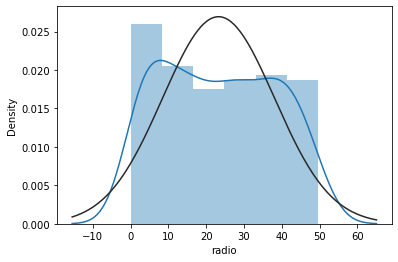

In [43]:
sns.distplot(df['radio'],fit=norm)

by analysing radio it is clear that negative skewness is there

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

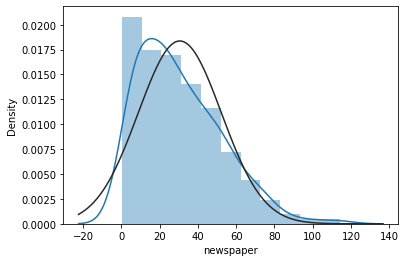

In [44]:
sns.distplot(df['newspaper'],fit=norm)

newspaper clearly having the negative skewness

# BOX PLOT

Analysing outlier we have to use box plot

<AxesSubplot:xlabel='TV'>

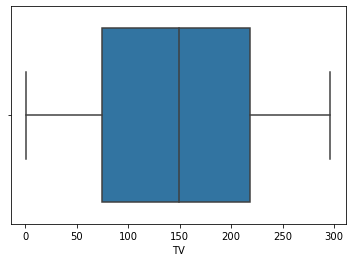

In [51]:
sns.boxplot(df['TV'])

TV dont have any outlier presence

<AxesSubplot:xlabel='radio'>

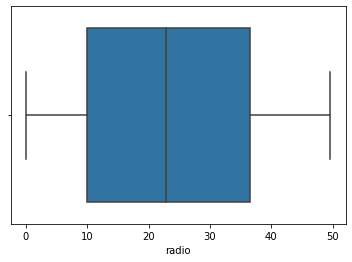

In [52]:
sns.boxplot(df['radio'])

the column radio also have no outliers

<AxesSubplot:xlabel='newspaper'>

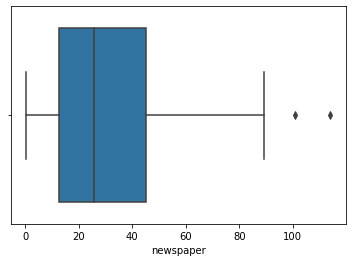

In [53]:
sns.boxplot(df['newspaper'])

the column 'newspaper having some outlier presence'

# BIVARIATE ANALYSIS

<AxesSubplot:title={'center':'comparison of TV and radio'}, xlabel='TV', ylabel='radio'>

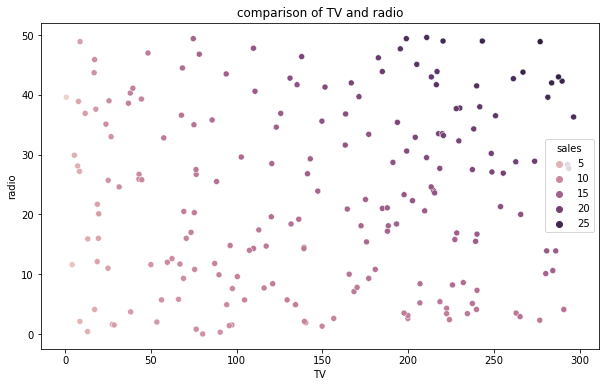

In [46]:
plt.figure(figsize=[10,6])
plt.title('comparison of TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df['sales'])

<AxesSubplot:title={'center':'comparison of TV and newspaper'}, xlabel='TV', ylabel='newspaper'>

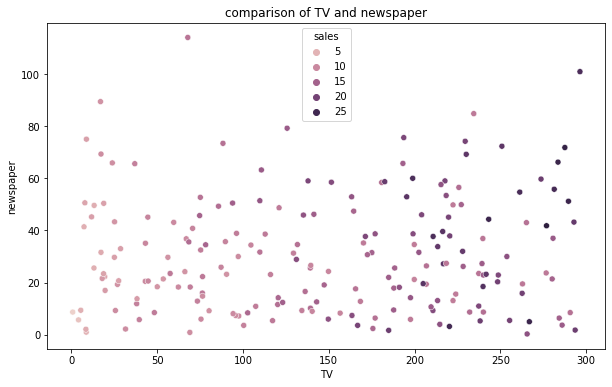

In [47]:
plt.figure(figsize=[10,6])
plt.title('comparison of TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df['sales'])

<AxesSubplot:title={'center':'comparison of radio and newspaper'}, xlabel='radio', ylabel='newspaper'>

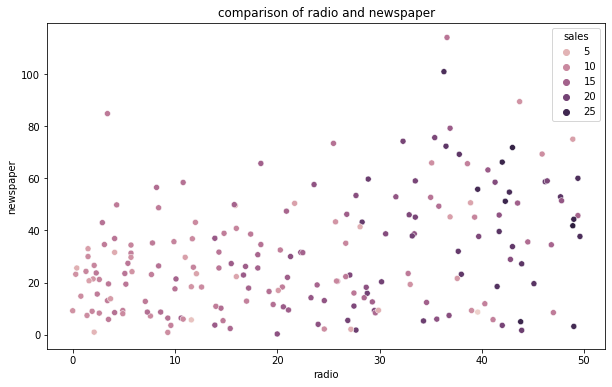

In [48]:
plt.figure(figsize=[10,6])
plt.title('comparison of radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df['sales'])

# multivariate analysis

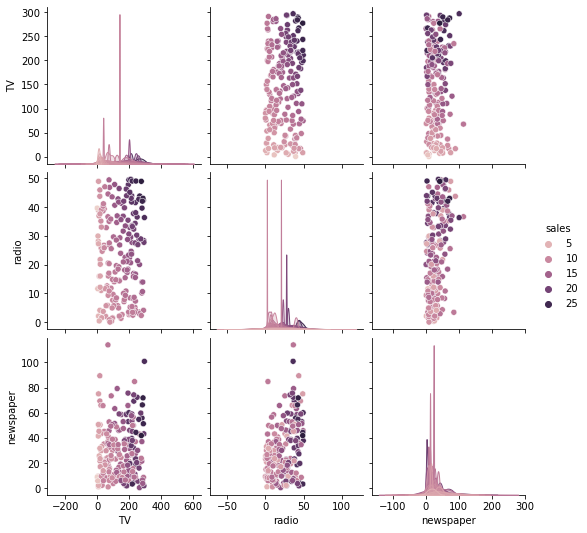

In [55]:
sns.pairplot(df,hue="sales")

the heigh sales values are surely showing in the heigh values of feature,,,so different advertisements increasing sales count

In [61]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [62]:
cor=df.corr()

In [63]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


BY ANALYSING CORRELATION DATA IT IS CLEAR THAT SALES(TARGET) IS VERY MUCH CORRELATED TO THE TV ADVERTISEMENT,,,
TV IS HIGHLY CORRELATED TO TARGET..AT THE SAME TIME NEWSPAPER IS LEAST CORELATED TO TARGET

In [64]:
import matplotlib.pyplot as plt

<AxesSubplot:>

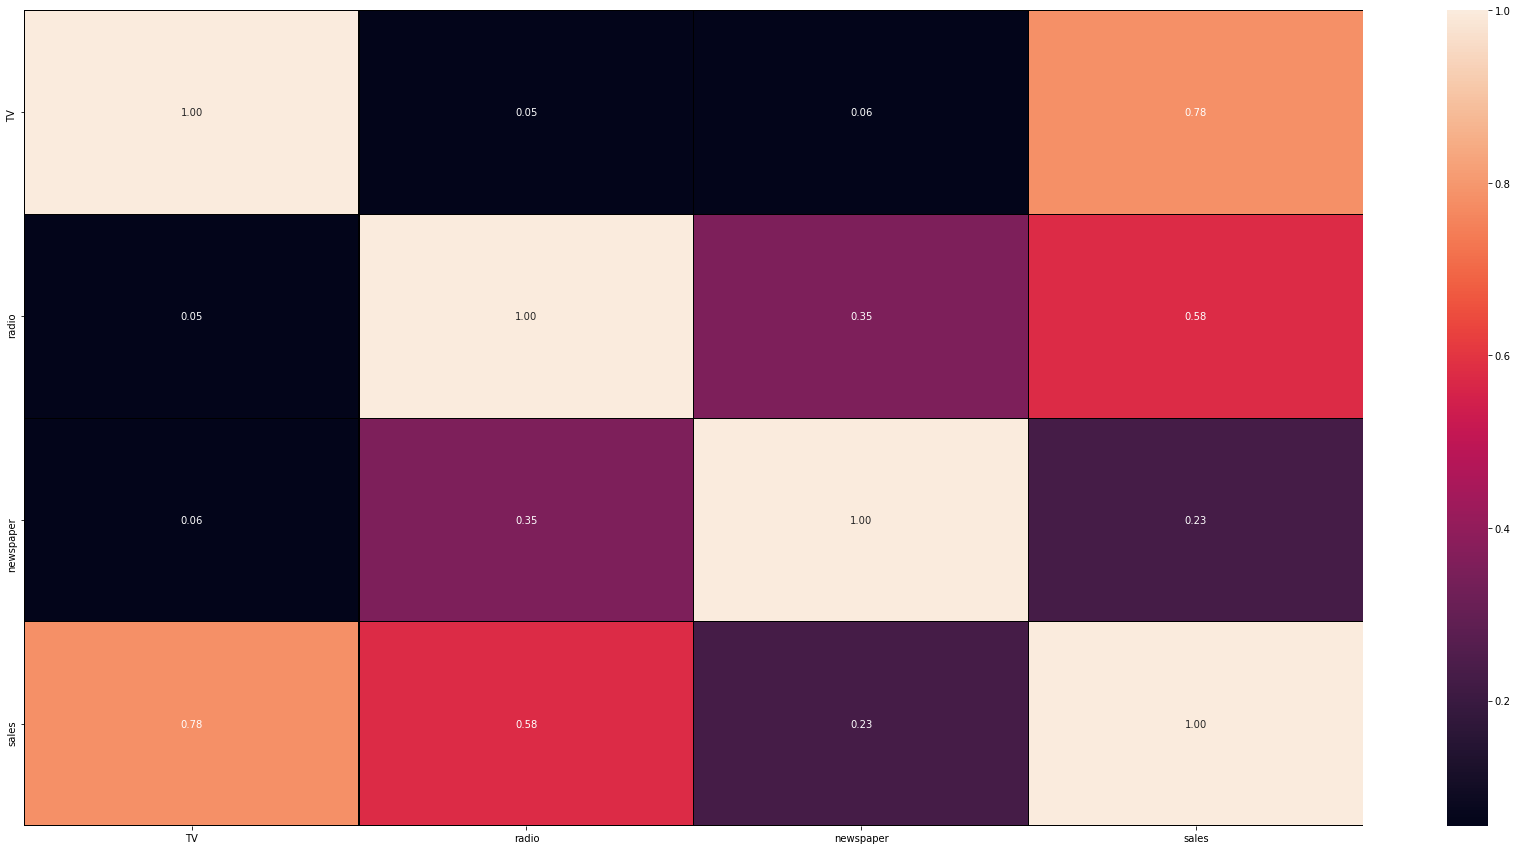

In [65]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

by analysing heatmap it is clear that radio and newspaper are less contributing to target

In [ ]:
we can plot a target dependency checking graph

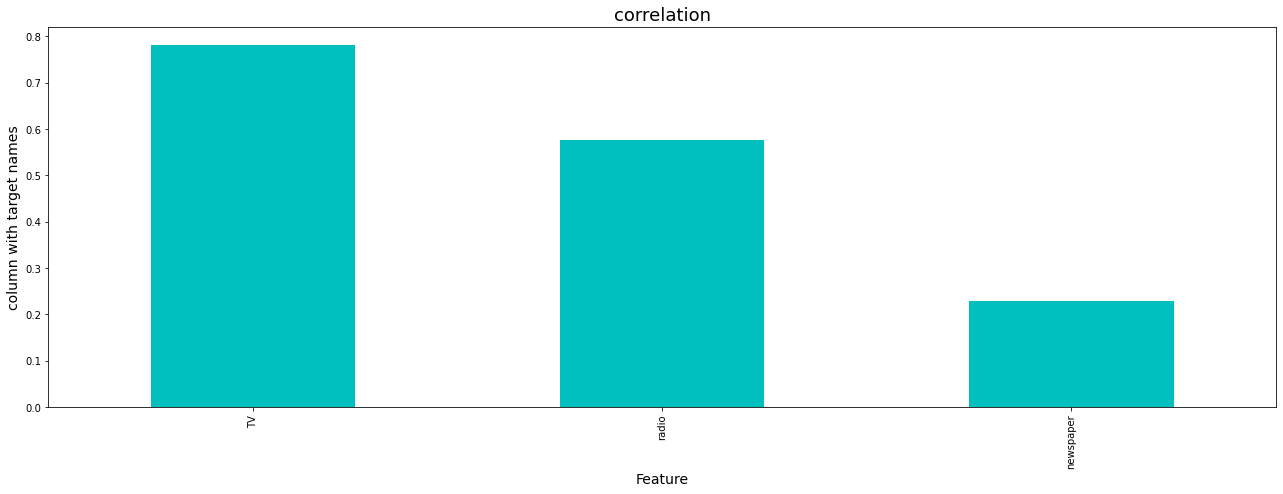

In [73]:
plt.figure(figsize=(22,7))
cor['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

all columns are correlated to target,,where TV is highly correlated

# outlier removal

some outliers are there ,it is viewable in box plot

In [67]:
df.shape

(200, 4)

In [68]:
from scipy.stats import zscore

In [69]:
z=np.abs(zscore(df))

In [70]:
new_df=df[(z<3).all(axis=1)]

In [71]:
new_df.shape

(198, 4)

loss is very less so we can go ahead

# skewness checking

In [72]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

skewness in acceptable range

THERE IS NO MULTICOLLINEARITY  in columns

# SPLITTING

In [74]:
 x=new_df.iloc[:,0:-1]

In [75]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [76]:
y=new_df.iloc[:,-1]

In [77]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [78]:
x.shape

(198, 3)

In [79]:
y.shape

(198,)

# SCALING FEATURE COLUMNS

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()

In [82]:
x=sc.fit_transform(x)

In [83]:
x

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

# splitting and applying algorithm

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [88]:
x_train.shape

(138, 3)

In [89]:
x_test.shape

(60, 3)

In [91]:
y_test.shape

(60,)

In [92]:
y_train.shape

(138,)

# LINEAR REGRESSION

In [93]:
lm=LinearRegression()

In [94]:
lm.fit(x_train,y_train)

LinearRegression()

In [95]:
pred=lm.predict(x_test)

In [96]:
print(pred)

[ 8.8000942   9.90079054 17.25266177 18.26137242 15.0302693   8.88879084
 15.62232286 14.74477909 17.4245715  15.17100812 11.36005821  9.91765835
 13.92600857  7.64814932 13.22528003  6.48008465 15.14334674 15.67860581
 17.76626354 12.42117975 13.91840278 12.35735761 23.58163693 10.12631003
 17.14667948  6.99181102  6.00599826 16.20838269 17.18119237  7.51629732
  9.73507186 20.39761119 21.22339454  5.94938966 18.16484314 14.24982061
  7.9039681   7.34918824 13.11464601  9.01475339 24.12410904 24.80432805
  9.4809076  19.13047931 20.09934361 15.28576374 20.83243069 21.7080143
 16.89667443 20.77747456 24.04640454 18.64229465 12.18268042 17.12486234
 20.47879951 11.37877496  9.72820027 18.91205985 15.07277327 18.20314226]


R2 SCORES

In [97]:
from sklearn.metrics import r2_score

In [98]:
lmscore=r2_score(y_test,pred)

In [99]:
print(lmscore)

0.9134949554356617


# SVR

In [100]:
from sklearn.svm import SVR

In [101]:
svr=SVR(kernel="linear")

In [102]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [103]:
svrpred=svr.predict(x_test)

In [104]:
print(svrpred)

[ 9.102748    9.99592655 17.61118633 18.42172578 15.42877141  9.10981404
 15.73425809 14.42970337 18.00761507 15.36372723 12.31928829 10.09540392
 13.64587156  7.78021964 13.76738294  6.83226829 16.05372874 15.25950877
 18.00376692 13.3614229  14.9202051  12.64203191 23.76111395 11.12581603
 17.36967552  7.30701317  6.54976939 15.72682065 17.04980033  8.21083185
 10.43120565 20.65667404 21.41440977  6.528166   18.63977871 15.1600778
  8.24750768  7.80662122 13.12485485  9.48199551 24.23046297 25.05122544
  9.935337   19.16702285 20.14477118 15.90565269 20.79453068 21.58233933
 16.75252372 21.15184674 24.18447302 18.53806603 12.16884398 17.20956678
 20.7192847  11.9781063   9.72922451 18.56311351 15.16103696 17.81117019]


In [105]:
svrscore=r2_score(y_test,svrpred)

In [106]:
print(svrscore)

0.9176864530538602


# DECISION TREE

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dtr=DecisionTreeRegressor()

In [109]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [110]:
dtrpred=dtr.predict(x_test)

In [111]:
print(dtrpred)

[10.6 11.  19.4 19.8 17.3 10.4 14.6 12.  19.2 15.5  8.  12.4 11.7  9.6
 12.   9.9 11.8 11.9 19.  10.9 10.4 13.2 24.2  5.6 19.8  9.9  6.6 11.9
 15.5  6.9  9.6 22.2 22.2  7.  19.6 11.8  9.9  9.7 12.8 11.4 24.2 24.2
 11.4 19.8 20.1 14.2 18.  18.  14.8 22.6 25.5 17.4 11.7 17.4 22.2 11.8
 10.3 16.1 15.5 14.8]


In [112]:
dtrscore=r2_score(y_test,dtrpred)

In [113]:
print(dtrscore)

0.9430227429293376


# K-NEIGHBOUR

In [114]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
knnr=KNeighborsRegressor()

In [116]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [117]:
knnrpred=knnr.predict(x_test)

In [118]:
print(knnrpred)

[10.9  10.7  18.22 18.3  15.86 10.6  16.32 12.14 18.1  15.2   6.92 10.62
 12.42  9.88 14.38  8.12 15.02 12.96 19.58  6.92  8.22 12.46 22.38  8.72
 15.92  9.34  7.84 12.62 14.56  8.5  10.7  21.2  21.44  7.34 19.38 14.34
 10.74  9.16 14.48 10.8  24.42 24.08 11.12 19.02 19.82 15.62 20.74 19.64
 14.94 22.28 23.2  16.4  12.2  16.72 21.56 11.2   9.96 14.32 16.02 14.32]


In [119]:
knnrscore=r2_score(y_test,knnrpred)

In [120]:
print(knnrscore)

0.9395859347655838


different algorithm providind different r2 scores to selecting a model we want to check the cross validation mean

# CROSS VALIDATION MEAN

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.8853605756683912


In [123]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.8759677907869561


In [124]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.9582245708852624


In [125]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.9367560788064591


HERE LEAST DIFFERENCE SHOWN BY K-NEIGHBOUR REGRESSION

# HYPER PARAMETER TUNING FOR K-NEIGHBOR REGRESSOR

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
parameter={'n_neighbors':np.arange(2,10),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','kd_tree','brute']}

In [128]:
GCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [129]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [130]:
GCV.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}

In [131]:
Finalsales_model=KNeighborsRegressor(algorithm ='auto', n_neighbors = 4, weights = 'uniform')

In [132]:
Finalsales_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [133]:
Finalpred=Finalsales_model.predict(x_test)

In [134]:
Finalr2score=r2_score(y_test,Finalpred)

In [135]:
print(Finalr2score)

0.9408448735347832


# SAVING AND CONCLUSION

In [136]:
conclusion=pd.DataFrame([Finalsales_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [137]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,10.975,10.275,18.55,17.925,15.325,10.375,16.725,11.95,18.4,15.35,...,24.075,16.775,12.725,16.675,21.15,11.175,10.275,14.2,15.175,14.2
Orginal,10.975,10.275,18.55,17.925,15.325,10.375,16.725,11.95,18.4,15.35,...,24.075,16.775,12.725,16.675,21.15,11.175,10.275,14.2,15.175,14.2


saving the model

In [138]:
import joblib

In [139]:
joblib.dump(Finalsales_model,"Finalsales_model.pk1")

['Finalsales_model.pk1']